In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import *
from sklearn.linear_model import *
import numpy as np
from sklearn.metrics import *
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve

In [2]:
cr_loan = pd.read_csv(r'cr_loan2.csv')

In [3]:
# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D

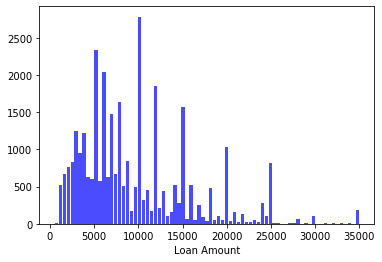

In [4]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


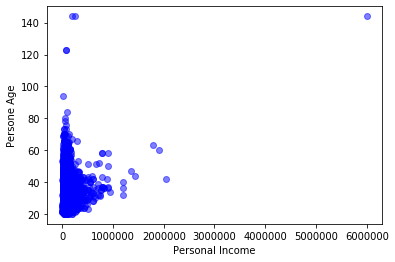

In [5]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [6]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [7]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [8]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


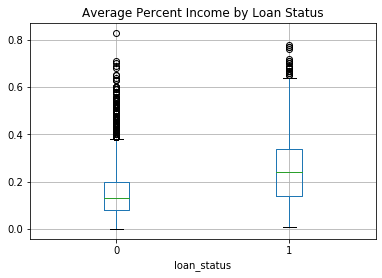

In [9]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [10]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


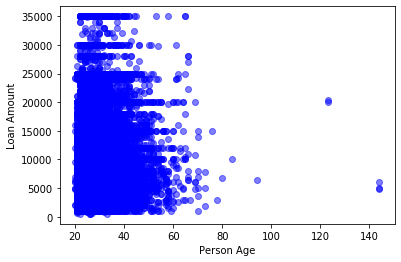

In [11]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

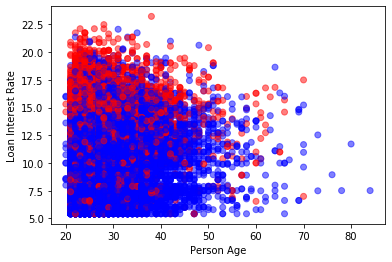

In [12]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

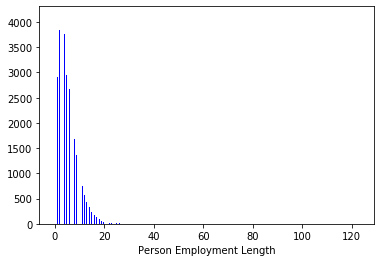

In [13]:
# Print an array of columns with null values
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Replace the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [14]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


In [15]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.43754064]


/home/david/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


In [17]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


In [18]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [19]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.203595
1            0      0.137401
2            0      0.119622
3            0      0.307440
4            0      0.505785


In [22]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    10861
1      925
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786



In [23]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786



In [24]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.81447381, 0.62378378]), array([0.96214923, 0.22260802]), array([0.88217402, 0.32812056]), array([9194, 2592]))


In [25]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[:2])

(array([0.81447381, 0.62378378]), array([0.96214923, 0.22260802]))


0.7995078907178008


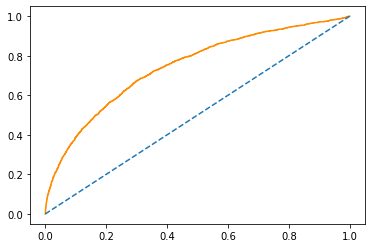

In [26]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

In [27]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8846  348]
 [2015  577]]


In [28]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8074 1120]
 [1477 1115]]


In [32]:
avg_loan_amnt = 9583.600936895346

In [33]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * num_defaults * (1 - default_recall))

12205392.413109777


In [37]:
# fit model no training data
clf_gbt = XGBClassifier()
clf_gbt.fit(X_train, y_train)

/home/david/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/david/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_lr = pd.DataFrame(preds[:,1], columns = ['prob_default'])

In [44]:
# Reassign the values of loan status based on the new threshold
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

preds_df_lr.head()

,prob_default,loan_status
0,0.203595,0
1,0.137401,0
2,0.119622,0
3,0.307440,0
4,0.505785,1


In [45]:
# Create predictions of probability for loan status using test data
preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_gbt = pd.DataFrame(preds[:,1], columns = ['prob_default'])

In [46]:
# Reassign the values of loan status based on the new threshold
preds_df_gbt['loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

preds_df_gbt.head()

,prob_default,loan_status
0,0.125217,0
1,0.138303,0
2,0.024192,0
3,0.163811,0
4,0.402502,1


In [47]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.85      0.88      0.86      9194
     Default       0.50      0.43      0.46      2592

    accuracy                           0.78     11786
   macro avg       0.67      0.65      0.66     11786
weighted avg       0.77      0.78      0.77     11786

              precision    recall  f1-score   support

 Non-Default       0.87      0.93      0.90      9194
     Default       0.68      0.49      0.57      2592

    accuracy                           0.84     11786
   macro avg       0.77      0.71      0.73     11786
weighted avg       0.83      0.84      0.83     11786

0.6617205289686254
0.7345104471295163


In [49]:
clf_logistic_preds = clf_logistic.predict_proba(X_test)[:,1]
clf_gbt_preds = clf_gbt.predict_proba(X_test)[:,1]

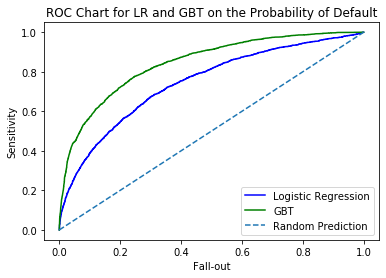

In [50]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [51]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

Logistic Regression AUC Score: 0.74
Gradient Boosted Tree AUC Score: 0.84


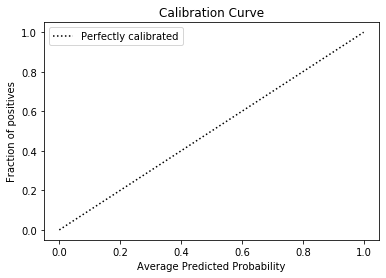

In [52]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [54]:
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, clf_logistic_preds, n_bins = 5)
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins = 5)

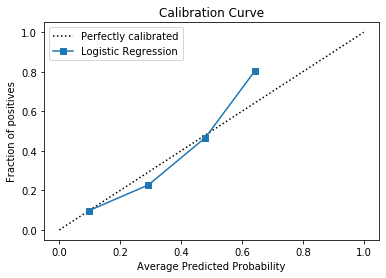

In [55]:
# Add the calibration curve for the logistic regression to the plot
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

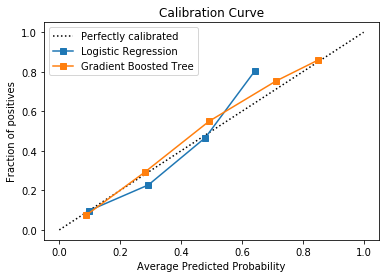

In [56]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()